In [1]:
!pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f1/7d/2e562207176a5dcdad513085670674bb11ffaf37e1393eacb6d7fb502481/scikit_learn-1.3.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.4/9.2 MB 5.5 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/9.2 MB 7.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.4/9.2 MB 8.9 MB/s eta 0:00:01
   -------- ------------------------------- 2.0/9.2 MB 9.6 MB/s eta 0:00:01
   ---------- ----------------------------- 2.5/9.2 MB 10.0 MB/s eta 0:00:01
   ------------- -------------------------- 3.0/9.2 MB 10.2 MB/s eta 0:00:01
   --------------- ------------------------ 3.6/9.2 MB 10.4 MB/s eta 0:00:01
   ------------------ --------------------- 4.2/9.2 MB 10.6 MB/s eta 0:00:01
   -------------------- -

In [2]:
import numpy as np
import pandas as pd


In [4]:
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape


(5572, 5)

In [7]:
#1.Data Cleaning
#2.EDA (Exporatory data analysis)
#3.Text preprocessing
#4.Model Building
#5.Evaluation
#6.Improvement
#7.Website
#8.Deploy

# 1. Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#droping last 3 columns as they mostly consist Nan data
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'] , inplace = True)

In [10]:
df.sample(5)

,v1,v2
3918,ham,I wish! I don't think its gonna snow that much...
180,ham,You lifted my hopes with the offer of money. I...
4245,ham,Well welp is sort of a semiobscure internet thing
502,ham,Check with nuerologist.
2790,spam,UÛªve Bin Awarded å£50 to Play 4 Instant Cash...


In [11]:
#Changing Column names to make it more descriptive

df.rename(columns = {'v1':'target' , 'v2' : 'Text'} , inplace = True)

In [12]:
df


,target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
#using label encoder
#changing the value of ham to 0 and spam to 1
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()



In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:
# Check for missing values
df.isnull().sum()

# df.isnull() creates a new DataFrame of the same shape as df, where each element is either True if the corresponding element in df is NaN (null) or False if it's not null.
# .sum() is used to calculate the sum of True values for each column. Since True is treated as 1 and False is treated as 0 in numerical operations, this effectively counts the number of NaN values in each column.


target    0
Text      0
dtype: int64

In [17]:
# check for duplicate values 
df.duplicated().sum()

# df.duplicated() creates a Series of boolean values,
# where each element is True if the corresponding row in the DataFrame is a duplicate of a 
# previous row and False if it's not a duplicate.
# .sum() is used to calculate the sum of True values in the Series. 
# Since True is treated as 1 and False is treated as 0 in numerical operations, 
# this effectively counts the number of duplicated rows in the DataFrame.

403

In [18]:
df = df.drop_duplicates(keep = 'first')

# drop_duplicates() is a pandas DataFrame method 
# that removes duplicated rows from the DataFrame. 
# The keep parameter determines which duplicates are kept and which are removed.
# In this case, keep='first' is specified,
# which means that only the first occurrence of each set
# of duplicated rows will be kept, and the subsequent duplicates will be removed.

In [19]:
df

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# 2. EDA

In [20]:
df.head()

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
# Counting the number of spam and ham sms  
# 0->ham 1->spam
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x20a4c1081d0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

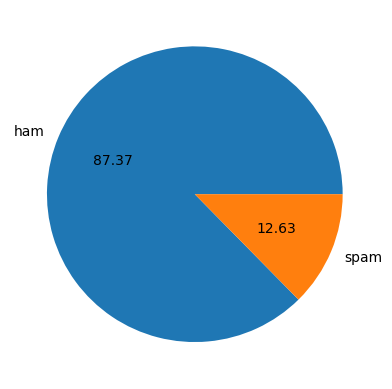

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts() ,labels = ['ham' , 'spam'] , autopct = "%0.2f")
#autopct shows value of ham and spam to 2decimal point in pie chart

# Data is imbalanced 

In [23]:
import nltk

# making 3 new column in dataset
#1. number of charaters in message.
#2. Number of words in sms.
#3. Number of sentences in sms.

# For that purpose we are using nltk (natural lang. tool kit)

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [25]:
#Counting number of characters
df['num_characters'] = df['Text'].apply(len)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11524\3731394742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['Text'].apply(len)


In [26]:
df

,target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [27]:
#number of words
df["num_words"] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

# lambda x: len(nltk.word_tokenize(x)) is a lambda function that takes each text element 'x',
# tokenizes it into words using the nltk.word_tokenize() function, 
# and then calculates the length of the resulting list of words.
# This effectively counts the number of words in each text.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11524\291742356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [28]:
df


,target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [29]:
#Counting number of sentences

df['num_sentences'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11524\2771607026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))


In [30]:
df


,target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [31]:
df
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#For ham messages

df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# For spam messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

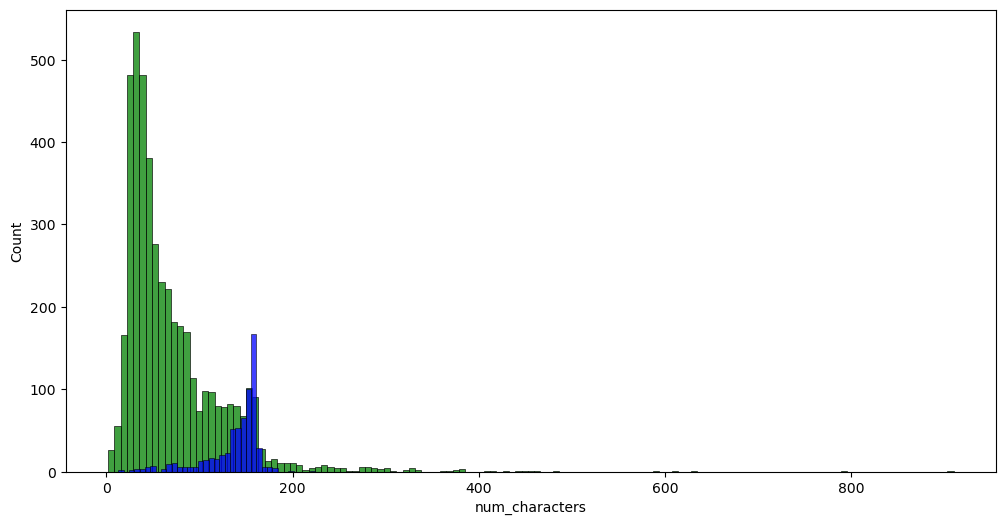

In [35]:
#Plot of number of charater of ham and spam messages
plt.figure(figsize = (12,6)) # define size of histogram 
sns.histplot(df[df['target'] == 0]['num_characters'],color='green')
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'blue')

<Axes: xlabel='num_words', ylabel='Count'>

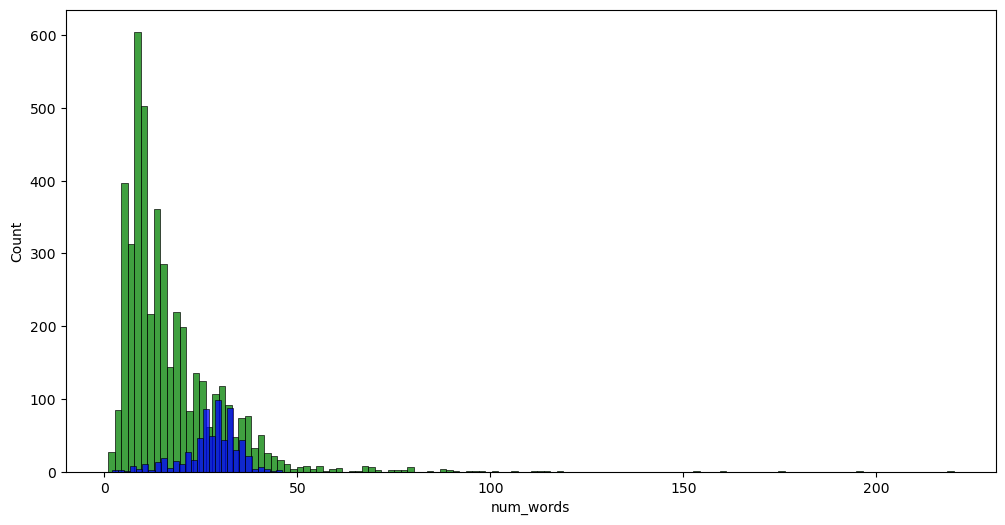

In [36]:
#For number of words
plt.figure(figsize = (12,6)) # define size of histogram 
sns.histplot(df[df['target'] == 0]['num_words'],color='green')
sns.histplot(df[df['target'] == 1]['num_words'],color = 'blue')

<Axes: xlabel='num_sentences', ylabel='Count'>

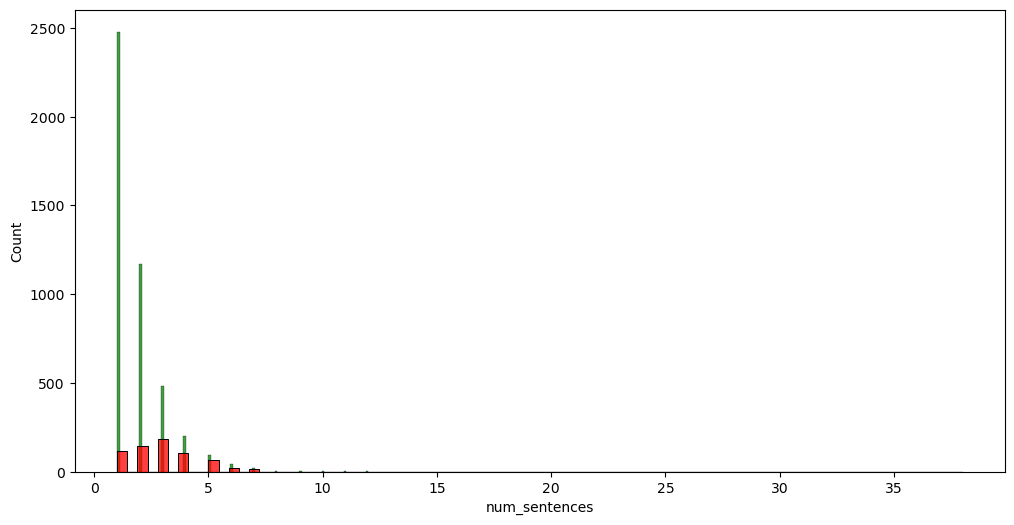

In [37]:
# For number of sentences
plt.figure(figsize = (12,6)) # define size of histogram 
sns.histplot(df[df['target'] == 0]['num_sentences'],color='green')
sns.histplot(df[df['target'] == 1]['num_sentences'],color = 'red')



C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


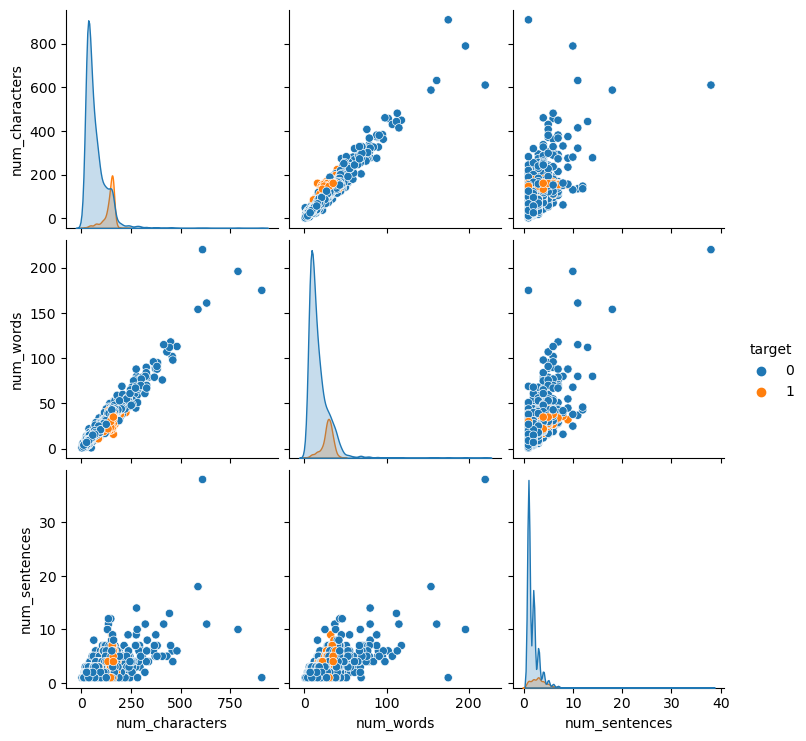

In [38]:
# For finding the relation b/w the 3 column of ham and spam (# of character, # of words , # of sentences)

sns.pairplot(df,hue = 'target')

# and from the bubble plot we can see that the data consist of outliers in ham category

<Axes: >

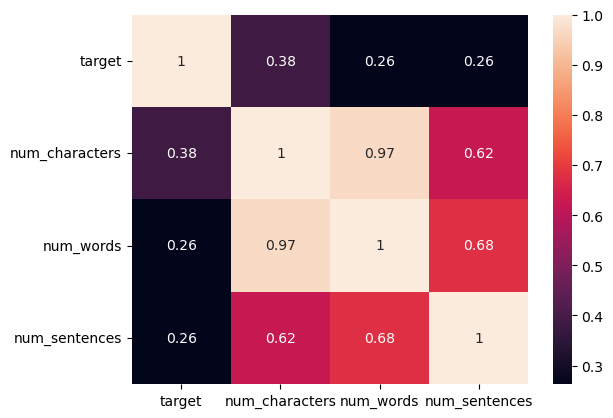

In [39]:
# Correlations
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot = True)

# We will keep the numcharater for training the model

# 3. Data Preprocessing
* Lower Case
* Tokenization
* Removing special charaters
* Removing stop words and punctuations
* Stemming - a technique used to extract the base form of the words by removing affixes from them

In [42]:

nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer


import string 
def transform_text(text):
    text = text.lower() # Conveting to lower case
    text = nltk.word_tokenize(text) # tokenization
    y = []
    #Removing special Charaters
    for i in text:
        if(i.isalnum()):
            y.append(i)
    #Removing stop words
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    #Stemming
    ps = PorterStemmer()
    
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

    
            
    
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [43]:
transform_text("hi how are you can you give me 50$ Lokesh . This is diya speaking its really urgent ")

'hi give 50 lokesh diya speak realli urgent'

In [44]:
df['Tranformed_Text'] = df['Text'].apply(transform_text)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11524\545082344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tranformed_Text'] = df['Text'].apply(transform_text)


In [45]:
df

,target,Text,num_characters,num_words,num_sentences,Tranformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [47]:
#Making Word Cloud
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width = 1000 , height = 1000 , min_font_size = 10, background_color = 'white')


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------- ---------------------------- 41.0/151.4 kB 960.0 kB/s eta 0:00:01
   ---------------------------------------- 151.4/151.4 kB 2.2 MB/s eta 0:00:00


In [48]:
#Makes a Cloud of most commonly used word in spam messages 
spam_wc = wc.generate(df[df['target'] == 1]['Tranformed_Text'].str.cat(sep = " ") )

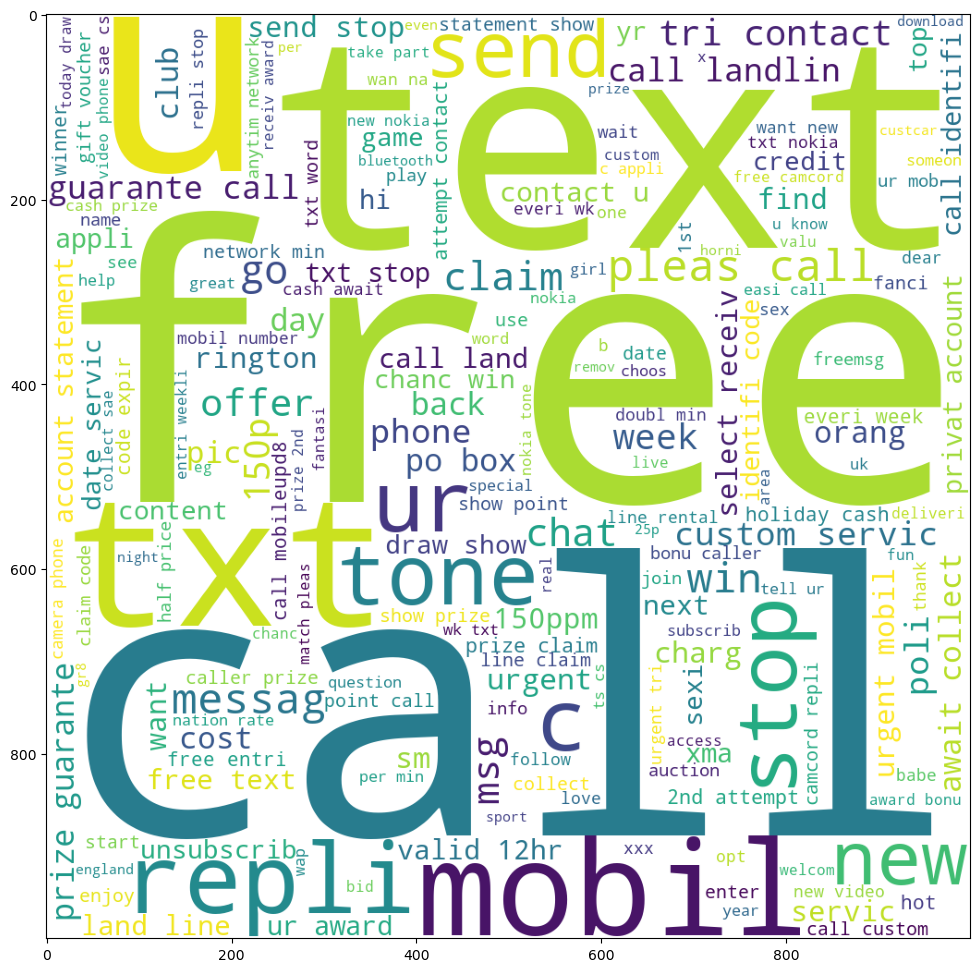

In [49]:


plt.figure(figsize = (12,12))
plt.imshow(spam_wc)

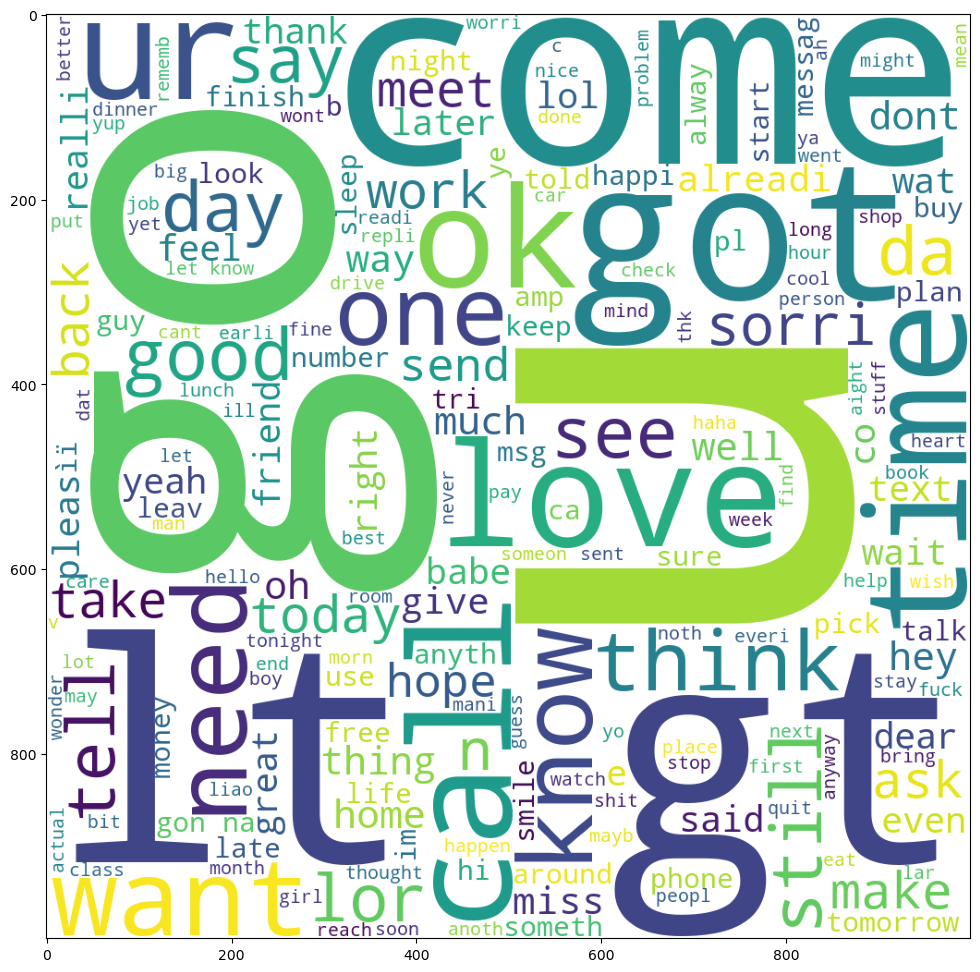

In [50]:
ham_wc = wc.generate(df[df['target'] == 0]['Tranformed_Text'].str.cat(sep = " ") )
plt.figure(figsize = (12,12))
plt.imshow(spam_wc)

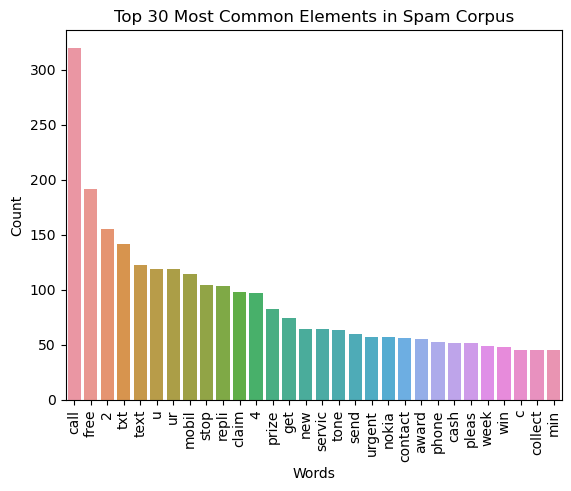

In [51]:
#For Spam
from collections import Counter
spam_corpus = []

for msg in df[df['target'] == 1]['Tranformed_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
dict1 = Counter(spam_corpus)

common_word = [ i[0] for i in dict1.most_common(30)]
count = [ i[1] for i in dict1.most_common(30)]

data1 = pd.DataFrame({'Words':common_word , 'Count':count})

sns.barplot(x='Words' , y = 'Count' , data = data1)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 30 Most Common Elements in Spam Corpus')
plt.show()

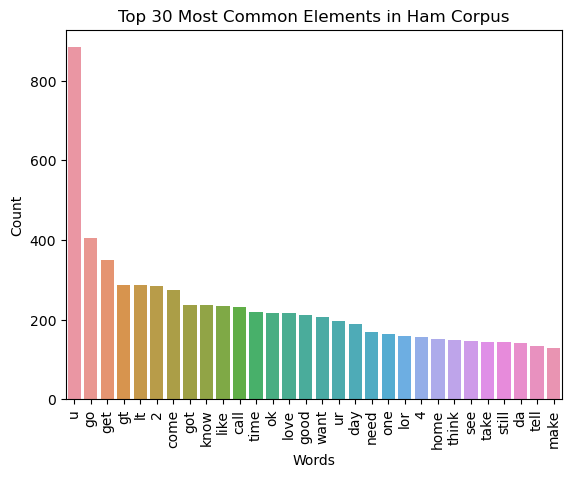

In [52]:
ham_corpus = []

for msg in df[df['target'] == 0]['Tranformed_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
dict1 = Counter(ham_corpus)

common_word = [ i[0] for i in dict1.most_common(30)]
count = [ i[1] for i in dict1.most_common(30)]

data = pd.DataFrame({'Words':common_word , 'Count':count})

sns.barplot(x='Words' , y = 'Count' , data = data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 30 Most Common Elements in Ham Corpus')
plt.show()

# 4. Model Building

In [53]:
#Vectorization of text

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 3000)
#Choose only top 3000 unique word 



In [54]:
X = tfidf.fit_transform(df['Tranformed_Text']).toarray()



In [55]:
y = df['target'].values

In [56]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 2)

In [59]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [60]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [61]:
#Guassian Naive Bayes
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [62]:
#MultiNomial Naive Bayes
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [63]:
#Bernoulli Naive Bayes
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


# Since Precision Of Multinomial Naive Bayes because its precision is 1::

In [64]:
#Model Improve 
#Can be done by : 

#1. Change the max_features parametes of Tfidf -> Changed Accuracy Score of Naive Bayes
#2. Scaling -> Not included
#3. Voting Classifier - Including the top models and then training the new model

In [65]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))